In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/BaseDeDatos/datos_completosRNN+H.csv" "/content/"

In [4]:
data = pd.read_csv("datos_completosRNN+H.csv")

In [5]:
data['Fecha'] = pd.to_datetime(data['Fecha'])

# Establecer la columna de fecha como el índice
data.set_index('Fecha', inplace=True)

# Configurar una frecuencia diaria
data = data.asfreq('D')

In [6]:
df = data.copy()

In [7]:
df

,Humedad_Relativa_Minima,Humedad_Relativa_Media,Humedad_Relativa_Maxima,Direccion_de_Viento_Minima,Direccion_de_Viento_Maxima,Velocidad_de_Viento_Minima,Velocidad_de_Viento_Maxima,eTo,Temperatura_Maxima,Temperatura_Minima,Precipitacion
Fecha,,,,,,,,,,,
2000-01-01,42.0,58.0,87.0,0.000000,6.000000,0.000000,18.500000,5.750000,27.5,13.7,0.0
2000-01-02,28.0,45.0,67.0,0.000000,6.000000,0.000000,33.400000,6.500000,29.3,12.3,0.1
2000-01-03,41.0,52.0,60.0,0.000000,14.000000,0.000000,37.100000,5.590000,27.1,13.9,0.0
2000-01-04,36.0,51.0,67.0,0.000000,2.000000,0.000000,11.100000,6.220000,28.4,12.1,8.6
2000-01-05,40.0,58.0,89.0,0.000000,6.000000,0.000000,18.500000,5.510000,25.9,11.7,2.7
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,21.0,33.0,51.0,2.151906,8.187082,2.990964,15.378424,5.357401,31.8,13.0,0.0
2022-12-28,36.0,51.0,81.0,2.201653,8.187082,2.990967,15.378424,5.357401,27.1,12.2,6.5
2022-12-29,53.0,57.0,62.0,2.231884,8.187080,2.990971,15.378425,5.357400,27.3,17.0,0.0


In [8]:
TempMax = df[['Temperatura_Maxima']].copy()

In [9]:
TempMax

,Temperatura_Maxima
Fecha,
2000-01-01,27.5
2000-01-02,29.3
2000-01-03,27.1
2000-01-04,28.4
2000-01-05,25.9
...,...
2022-12-27,31.8
2022-12-28,27.1
2022-12-29,27.3


In [10]:
TempMax.isnull().sum()

Temperatura_Maxima    0
dtype: int64

<Axes: xlabel='Fecha'>

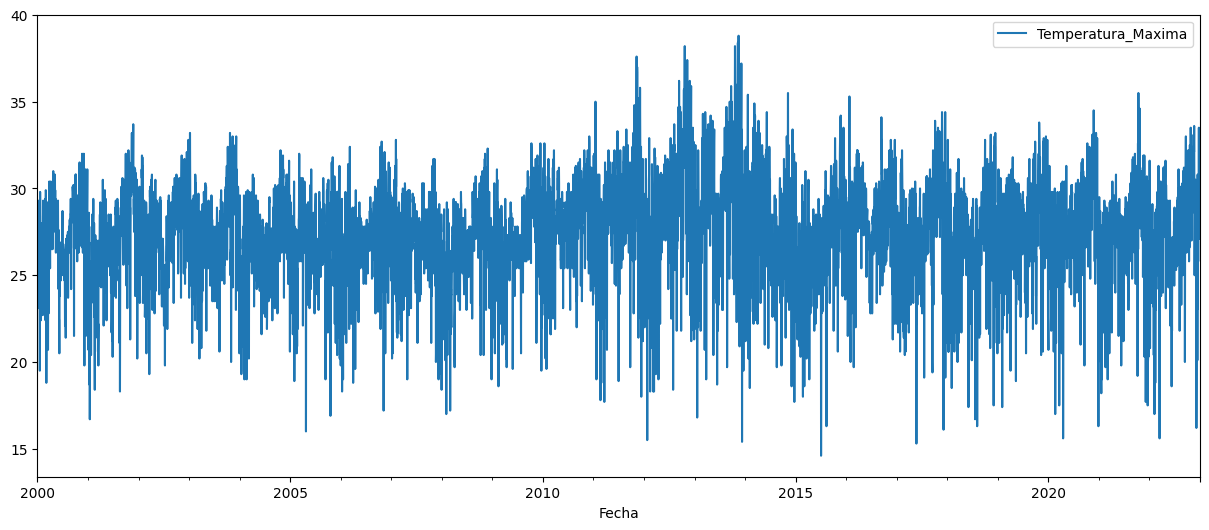

In [11]:
TempMax.plot(figsize=(15,6))

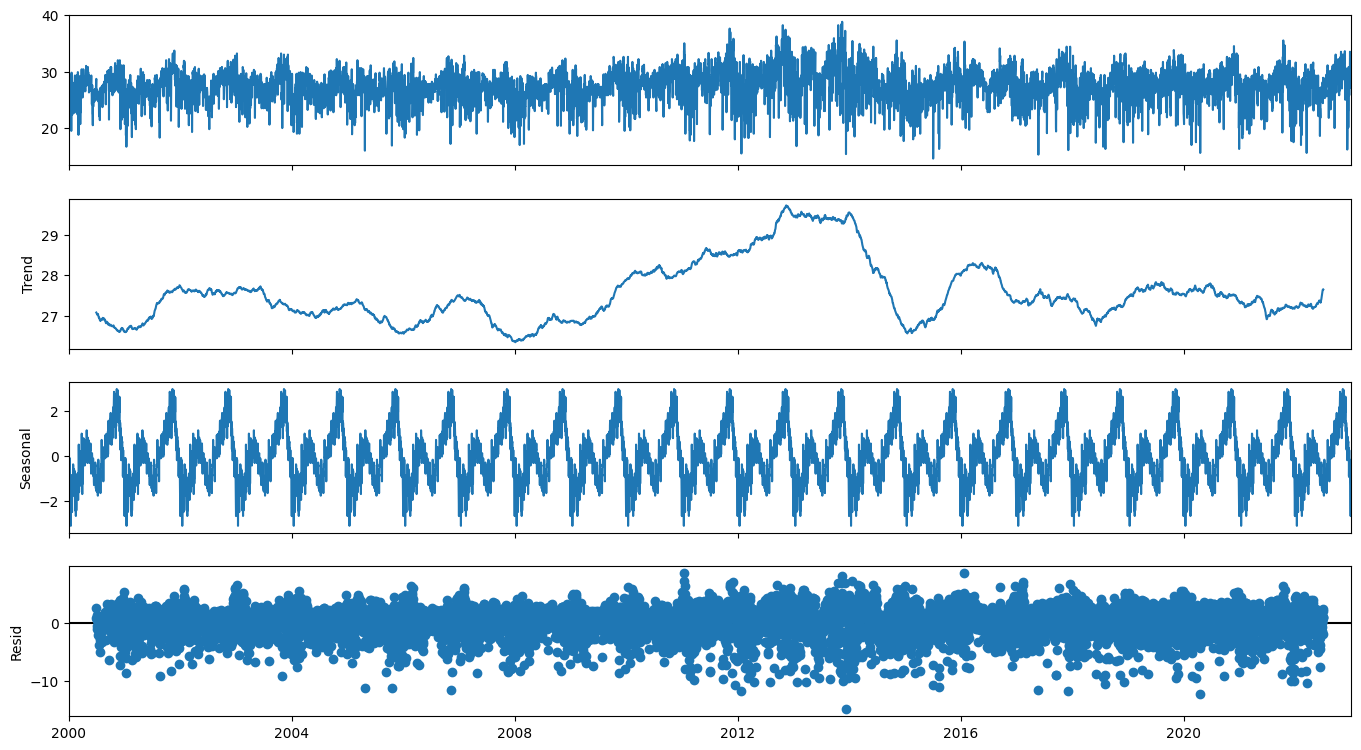

In [12]:
# Descomposición de la serie de tiempo

import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(TempMax,period=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [13]:
train = TempMax.iloc[:-365]

In [14]:
test = TempMax.iloc[-365:]

In [15]:
train

,Temperatura_Maxima
Fecha,
2000-01-01,27.5
2000-01-02,29.3
2000-01-03,27.1
2000-01-04,28.4
2000-01-05,25.9
...,...
2021-12-27,22.7
2021-12-28,23.8
2021-12-29,26.7


In [16]:
test

,Temperatura_Maxima
Fecha,
2022-01-01,30.4
2022-01-02,31.6
2022-01-03,28.8
2022-01-04,27.8
2022-01-05,20.8
...,...
2022-12-27,31.8
2022-12-28,27.1
2022-12-29,27.3


In [17]:
# Importante!
# En series de tiempo es necesario escalar las variable o caracteristicas!
# Para escalar puedes usar normalización,estandarización u otro tipo de escalado.
train_max = train.max()
train_min = train.min()
print(train_max)
print(train_min)

Temperatura_Maxima    38.8
dtype: float64
Temperatura_Maxima    14.6
dtype: float64


In [18]:
# Normalizamos los set de datos, train y test!
train_set_scaled = (train - train_min)/(train_max - train_min)
test_set_scaled = (test - train_min)/(train_max - train_min)

In [19]:
# Revisamos el escalado!
train_set_scaled.head()

,Temperatura_Maxima
Fecha,
2000-01-01,0.533058
2000-01-02,0.607438
2000-01-03,0.516529
2000-01-04,0.570248
2000-01-05,0.466942


In [20]:
train_set_scaled.shape

(8036, 1)

In [21]:
# Definimos la funcion de la arquitectura X - y.
# Funcion de los windows
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [22]:
# Definimos un time_step y procedemos a crear los dataframes!
time_steps = 3 # Comencemos un vector unitario

X_train, y_train = create_dataset(train_set_scaled, train_set_scaled.Temperatura_Maxima , time_steps)
X_test,  y_test  = create_dataset(test_set_scaled,  test_set_scaled.Temperatura_Maxima, time_steps)

In [23]:
X_test

array([[[0.65289256],
        [0.70247934],
        [0.58677686]],

       [[0.70247934],
        [0.58677686],
        [0.54545455]],

       [[0.58677686],
        [0.54545455],
        [0.25619835]],

       ...,

       [[0.60330579],
        [0.7107438 ],
        [0.51652893]],

       [[0.7107438 ],
        [0.51652893],
        [0.52479339]],

       [[0.51652893],
        [0.52479339],
        [0.57438017]]])

In [24]:
# reshape input debe ser 3D para las LSTM's: [samples, timesteps, features]
X_train.shape

(8033, 3, 1)

In [25]:
# Importando de keras las librerias mas importantes!
from keras.models import Sequential # Arquitectura de red neuronal!
from keras.layers import Dense      # Capa densa!
from keras.layers import LSTM       # Capa recurrente
from keras.layers import Dropout    # Evita el overfitting (Inactiva algunas neuronas)

def lstm_architecture(X_data,rate_dropout):
    # Inicializando the RNN
    model = Sequential()

    # 1ra capa LSTM y Dropout para regularización.
    # input_shape (amplitude,1)
    # return_sequences = True, devolvera una salida por cada neurona de manera densa en false se unen las devoluciones para cada neurona
    model.add(LSTM(units = 250, return_sequences = True, input_shape=(X_data.shape[1], X_data.shape[2])))
    # 20% de las neuronas serán ignoradas durante el training (20%xNodos = 10)
    # Para hacer menos probable el overfiting
    model.add(Dropout(rate=rate_dropout))

    # 2da capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    # 3ra capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = True))
    model.add(Dropout(rate=rate_dropout))

    # 4ta capa LSTM y Dropout para regularización.
    model.add(LSTM(units = 250, return_sequences = False))
    model.add(Dropout(rate=rate_dropout))

    # Capa de Salida!
    model.add(Dense(units = 1))

    # Resumen del modelo!
    model.summary()

    return model

In [26]:
import datetime
print('Iniciando a las: ', datetime.datetime.now())
print("...")

# Compiling the RNN
model_1 = lstm_architecture(X_data=X_train,rate_dropout=0.2)
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')

Iniciando a las:  2023-12-07 01:40:14.367546
...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 250)            252000    
                                                                 
 dropout (Dropout)           (None, 3, 250)            0         
                                                                 
 lstm_1 (LSTM)               (None, 3, 250)            501000    
                                                                 
 dropout_1 (Dropout)         (None, 3, 250)            0         
                                                                 
 lstm_2 (LSTM)               (None, 3, 250)            501000    
                                                                 
 dropout_2 (Dropout)         (None, 3, 250)            0         
                                                                 
 lstm_3

In [27]:
    # Ejecutamos la RNN!

history = model_1.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=32,
                    shuffle=False)

print("...")
print('Terminando a las: ', datetime.datetime.now())

Epoch 1/40
252/252 [==============================] - 29s 74ms/step - loss: 0.0213
Epoch 2/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0141
Epoch 3/40
252/252 [==============================] - 21s 83ms/step - loss: 0.0131
Epoch 4/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0123
Epoch 5/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0110
Epoch 6/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0108
Epoch 7/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0108
Epoch 8/40
252/252 [==============================] - 18s 72ms/step - loss: 0.0106
Epoch 9/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0107
Epoch 10/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0106
Epoch 11/40
252/252 [==============================] - 18s 73ms/step - loss: 0.0105
Epoch 12/40
252/252 [==============================] - 18s 72ms/step - loss: 0.0105
E

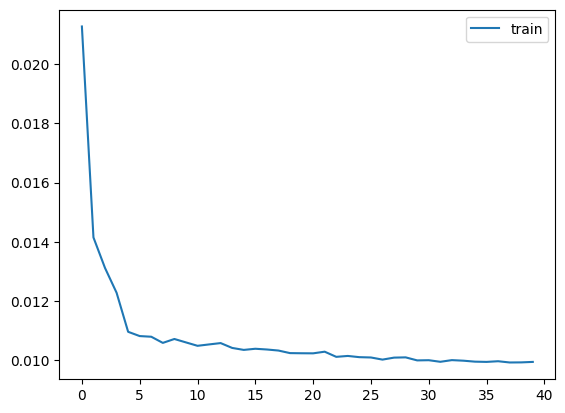

In [28]:
# Revisamos algunos parametros de ajuste del modelo!
plt.plot(history.history['loss'], label='train')
plt.legend();
plt.show()

In [29]:
# Predecimos sobre la data de test!
y_pred = model_1.predict(X_test)

12/12 [==============================] - 3s 27ms/step


In [30]:
# Regresamos la informacion a los valores originales!
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]    #  valores reales de test!
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]    #  valores pronosticados para validar!
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]  #  valores de entrenamiento!

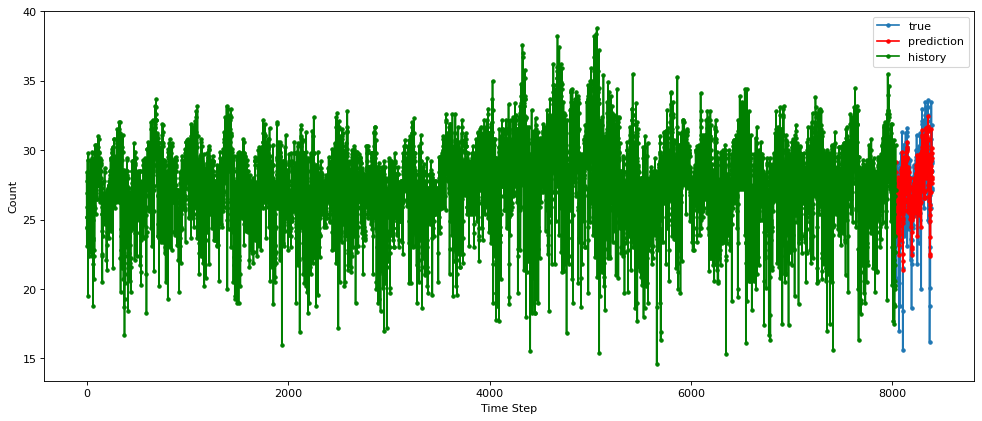

In [31]:
# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', marker='.', label="history")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

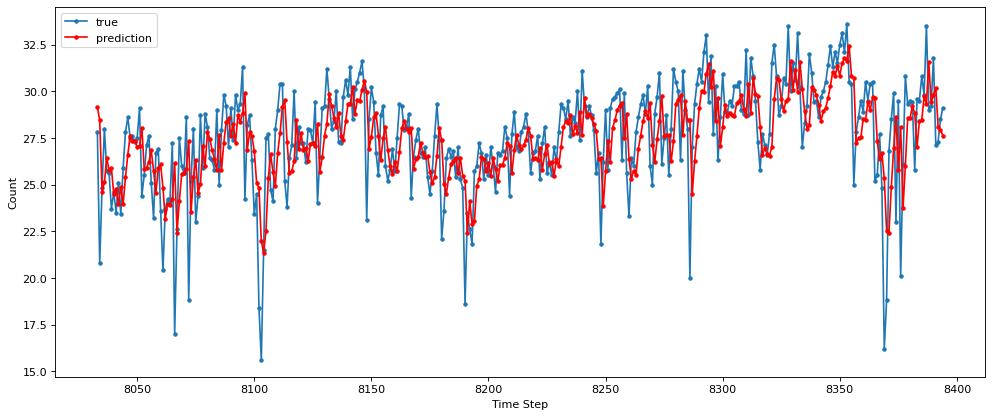

In [32]:
# Visualizamos los resultados!
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', marker='.', label="prediction")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.legend()
plt.show()

In [33]:
# Vemos algunos indicadores del ajuste!
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: ',rmse)

# Definimos y calculamos el MAPE (mean_absolute_percentage_error)
y_test, y_pred = np.array(y_test), np.array(y_pred)
print(f'MAPE: ',np.mean(np.abs((y_test - y_pred) / y_test)) * 100)

RMSE:  2.358800398392163
MAPE:  10.17226126028395


In [34]:
from scipy.stats import pearsonr

# 'y_pred' es bidimensional; aplana 'y_pred' para que tenga una dimensión.
pred_array = y_pred.flatten()

# 'y_test' ya es unidimensional, por lo que no necesita ser modificado.
test_array = y_test

# Verifica que ambos arreglos tienen la misma longitud antes de calcular la correlación de Pearson.
if len(test_array) == len(pred_array):
    corr, _ = pearsonr(test_array, pred_array)
    print('Correlación de Pearson: %.3f' % corr)
else:
    print("Los arrays no tienen la misma longitud.")

Correlación de Pearson: 0.572


In [35]:
from scipy.spatial.distance import directed_hausdorff

# Asegúrate de que ambos arrays tengan la forma correcta para la función directed_hausdorff
# Convertirlos en arrays de dos dimensiones donde cada punto es un array con un elemento
u = np.atleast_2d(test_array).T
v = np.atleast_2d(pred_array).T

# Calcula la distancia dirigida de Hausdorff en ambos sentidos
forward = directed_hausdorff(u, v)[0]
backward = directed_hausdorff(v, u)[0]

# La distancia de Hausdorff es el máximo de estas dos distancias
distance = max(forward, backward)
print('La distancia Hausdorff es:', distance)

La distancia Hausdorff es: 5.733763122558594
